<a href="https://colab.research.google.com/github/smkmohsin/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based feature



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# <b> Importing Libaries

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



%matplotlib inline

# <b> Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project 3/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')

# <b> Exploratory Data Analysis

In [4]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
dataset.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
dataset.shape

(7787, 12)

## <b> Missing Data Check

In [8]:
# Missing Value Count Function
def show_missing():
    missing = dataset.columns[dataset.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


Not removing any feature or row with missing value as these features are not requeired for clustering

## <b> Top 10 countries producing contents on Netflix

In [9]:
# Top 10 countries producing contents in netflix
top_10_country = dataset['country'].value_counts()[:10].reset_index().rename(columns={'index':'country', 'country': 'count'})
top_10_country

,country,count
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
5,Canada,177
6,Spain,134
7,France,115
8,Egypt,101
9,Mexico,100


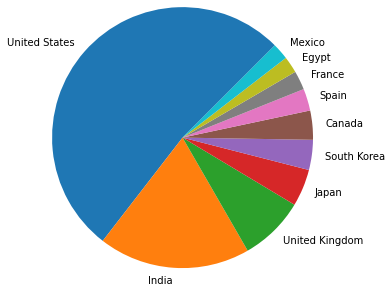

In [10]:
plt.pie(top_10_country['count'].values, labels=top_10_country['country'], radius=1.5, startangle=45)
plt.show()

## <b> Top 20 contents according to Ratings on Netflix

In [11]:
ratings_count = dataset[['rating','type']].value_counts().reset_index().rename(columns={0: 'count'})
ratings_count

,rating,type,count
0,TV-MA,Movie,1845
1,TV-14,Movie,1272
2,TV-MA,TV Show,1018
3,R,Movie,663
4,TV-14,TV Show,659
5,TV-PG,Movie,505
6,PG-13,Movie,386
7,TV-PG,TV Show,301
8,PG,Movie,247
9,TV-Y7,TV Show,176


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


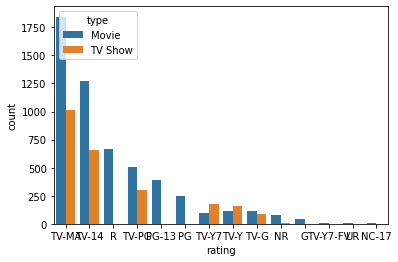

In [12]:
# Visualize contents based on ratings
sns.barplot('rating', 'count',hue='type',data=ratings_count)
rcParams['figure.figsize'] = 14,7

<b><u>Detail about Ratings:</u></b>

**TV-Y:** All Children
Intended for children ages 2 to 6 and is not designed or expected to frighten.

**TV-Y7:** Directed to Older Children
Intended for children ages 7 and older. Best suited for children who know the difference between real life and make-believe. Contains mild fantasy or comedic violence. Some content could frighten younger children (under age 7).

**TV-Y7 FV:** Directed to Older Children - Fantasy Violence
Intended for older children. Contains fantasy violence more combative than TVY7 programs.

**TV-G:** General Audience
Intended for all ages. Contains little or no violence, no strong language and little or no sexual dialogue or situations.

**TV-PG:** Parental Guidance Suggested
Intended for younger children in the company of an adult. Possibly contains some suggestive dialogue, infrequent coarse language, some sexual situations or some moderate violence.

**TV-14:** Parents Strongly Cautioned
Intended for children ages 14 and older in the company of an adult. Possibly contains intensely suggestive dialogue, strong coarse language, intense sexual situations or intense violence.

**TV-MA:** Mature Audience Only
Intended for adults and may be unsuitable for children under 17. Possibly contains crude indecent language, explicit sexual activity or graphic violence.

**G:** General Audiences
This program is designed to be appropriate for all ages. This rating indicates a film contains nothing that would offend parents for viewing by children.

**PG:** Parental Guidance Suggested
Parents are urged to give parental guidance. This film may contain some material parents might not like for their young children.

**PG-13:** Parents Strongly Cautioned
Some material may not be suited for children under age 13. May contain violence, nudity, sensuality, language, adult activities or other elements beyond a PG rating, but doesn’t reach the restricted R category.

**R:** Restricted
This rating is for films specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

**NC-17:** Clearly Adult
This rating is applied to films the MPAA believes most parents will consider inappropriate for children 17 and under. It indicates only that adult content is more intense than in an R rated movie.

## <b> Contents based on TV Shows vs Movie

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


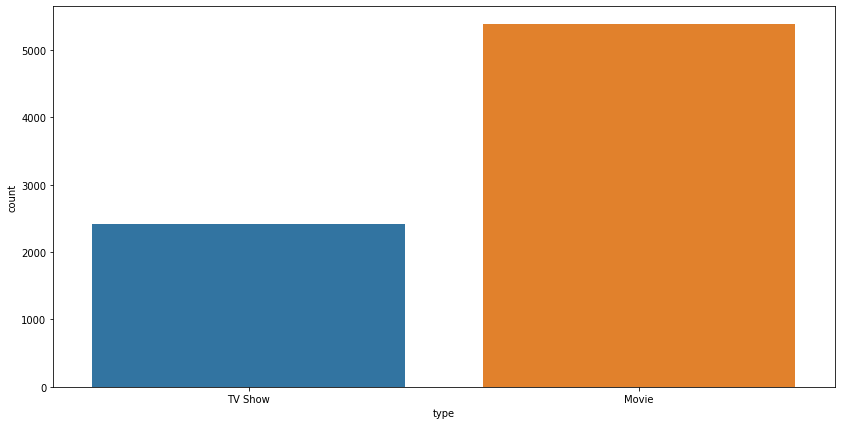

In [13]:
sns.countplot(dataset['type'])

In [14]:
def get_unique_list(col_name, dataset_name):

  # Extract unique names
  list_ = []

  for list_of_name in  dataset_name[col_name].unique():
    split_list_of_name = list_of_name.split(sep=', ')
    for name in split_list_of_name:
      list_.append(name)

  # Eliminate repeated names
  list_ = list(set(list_)) 
  return list_

In [15]:
list_of_genres = get_unique_list('listed_in', dataset)
np.array(list_of_genres)

array(['Classic Movies', 'Teen TV Shows', 'Action & Adventure',
       'Anime Series', 'Movies', 'TV Dramas', 'TV Action & Adventure',
       'International TV Shows', 'Spanish-Language TV Shows',
       'Cult Movies', 'Documentaries', 'Comedies', 'Romantic Movies',
       'Anime Features', 'Horror Movies', 'Faith & Spirituality',
       'TV Mysteries', 'Sports Movies', 'International Movies',
       "Kids' TV", 'TV Comedies', 'Dramas', 'Reality TV',
       'Sci-Fi & Fantasy', 'TV Shows', 'Stand-Up Comedy & Talk Shows',
       'Music & Musicals', 'TV Thrillers', 'Classic & Cult TV',
       'LGBTQ Movies', 'Thrillers', 'British TV Shows', 'Korean TV Shows',
       'Crime TV Shows', 'Science & Nature TV',
       'Children & Family Movies', 'TV Sci-Fi & Fantasy',
       'Independent Movies', 'Docuseries', 'Stand-Up Comedy',
       'Romantic TV Shows', 'TV Horror'], dtype='<U28')

In [16]:
len(list_of_genres)

42

## <b> WordCloud of Genres

In [17]:
from collections import Counter

genres=list(dataset['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',"").replace("-",""))
g=Counter(gen)

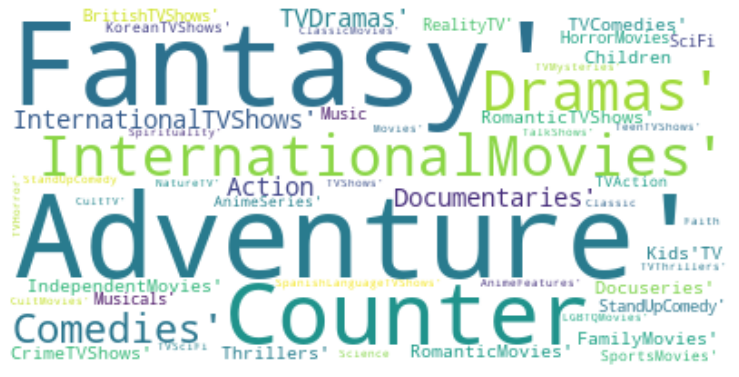

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud

wordcloud = WordCloud(collocations = False,background_color="white").generate(str(g))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## <b> Top 5 Countries with top 5 Genres


In [19]:
def get_genres_count(country):
  genres_count = dataset[dataset['country'] == country]['listed_in'].value_counts().reset_index().rename(columns={'index': 'listed_in', 'listed_in': 'count'})
  return genres_count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

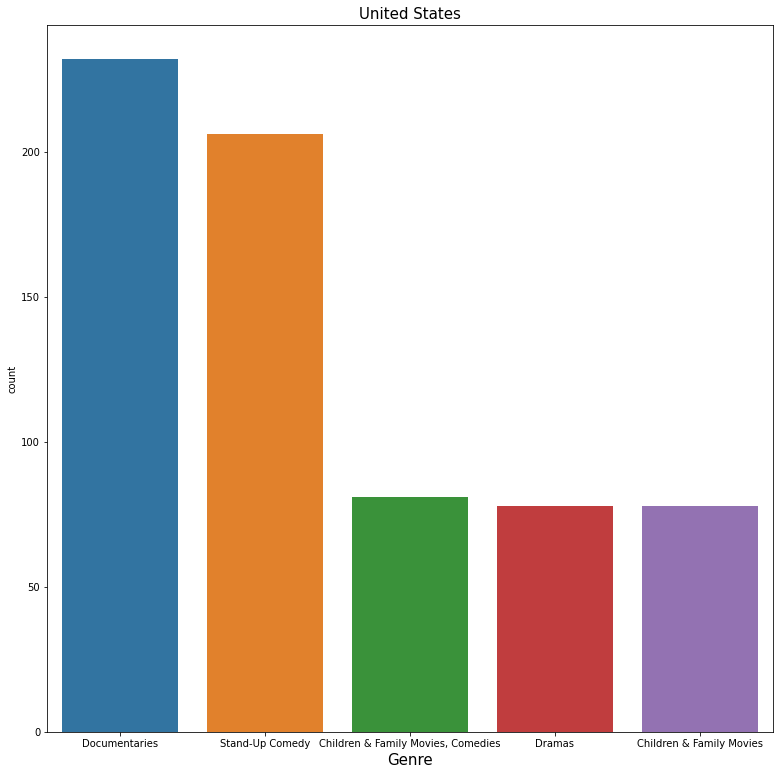

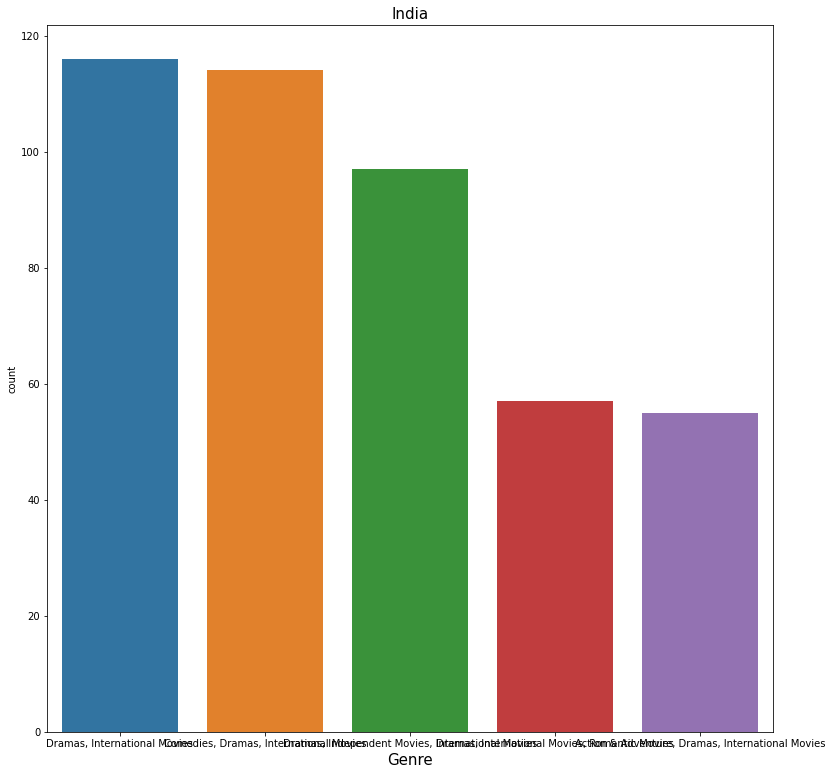

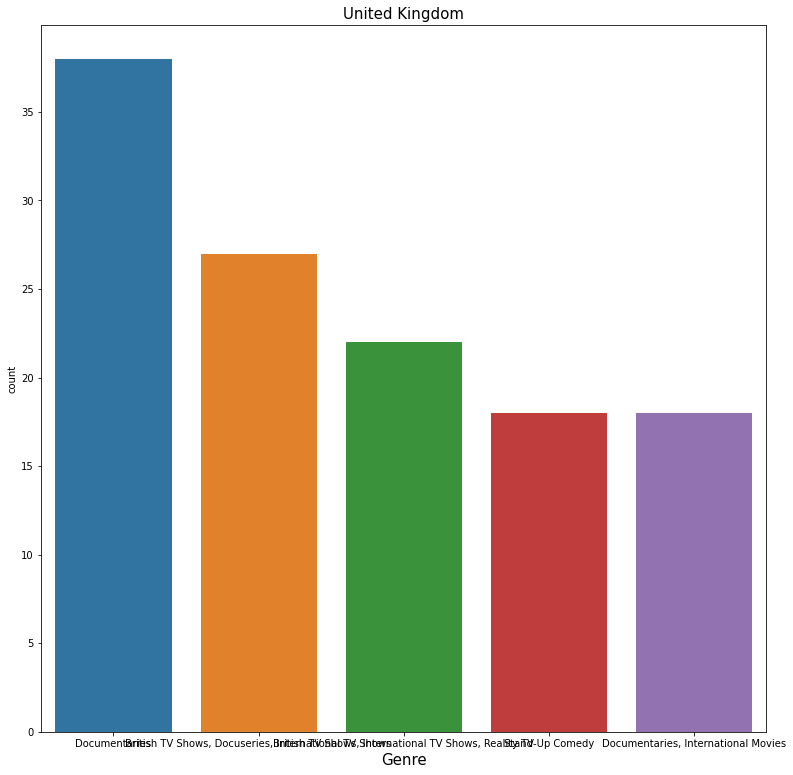

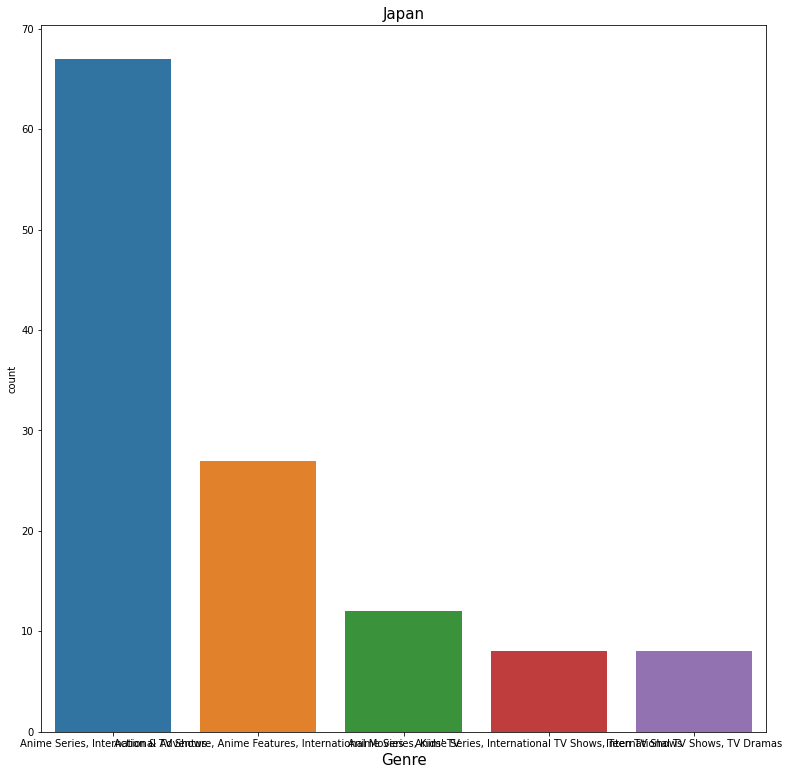

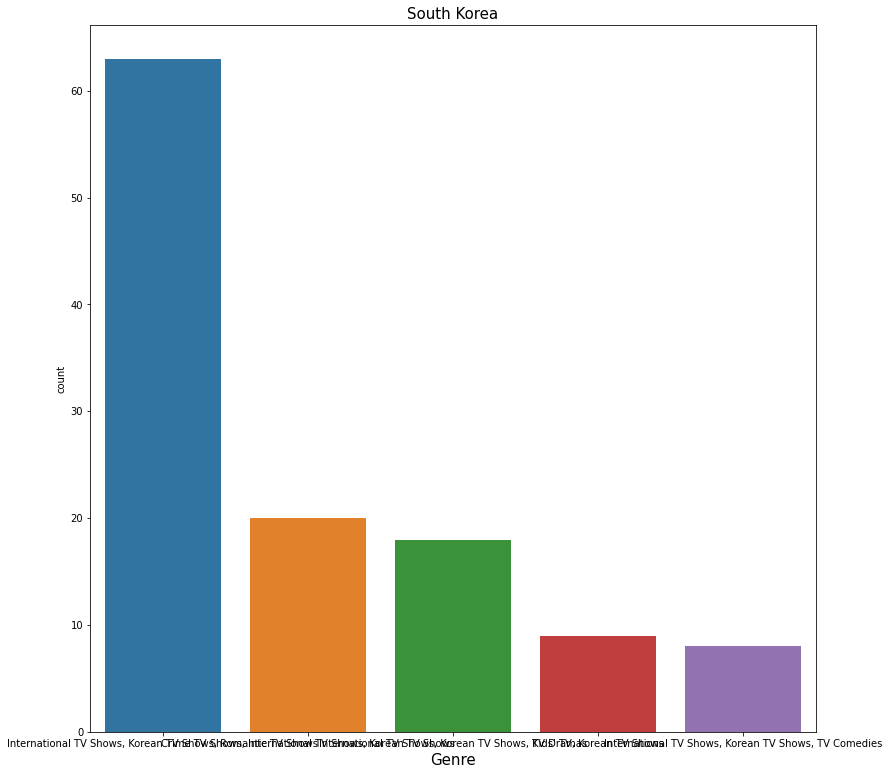

In [20]:
for country in top_10_country['country'][:5].values:
  genres_count = pd.DataFrame(get_genres_count(country))
  plt.figure()
  sns.barplot('listed_in', 'count' ,data= genres_count[:5])
  plt.title(country, fontsize = 15)
  plt.xlabel('Genre', fontsize = 15)
  plt.xticks(rotation = 0)
  plt.show

## <b>Understanding what type content is available in different countries

In [21]:
type_of_content =  dataset[['country','type']].value_counts().reset_index().rename(columns={0: 'count'})
type_of_content.head(20)

,country,type,count
0,United States,Movie,1850
1,India,Movie,852
2,United States,TV Show,705
3,United Kingdom,TV Show,204
4,United Kingdom,Movie,193
5,Japan,TV Show,157
6,South Korea,TV Show,147
7,Canada,Movie,118
8,Spain,Movie,89
9,Egypt,Movie,89


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


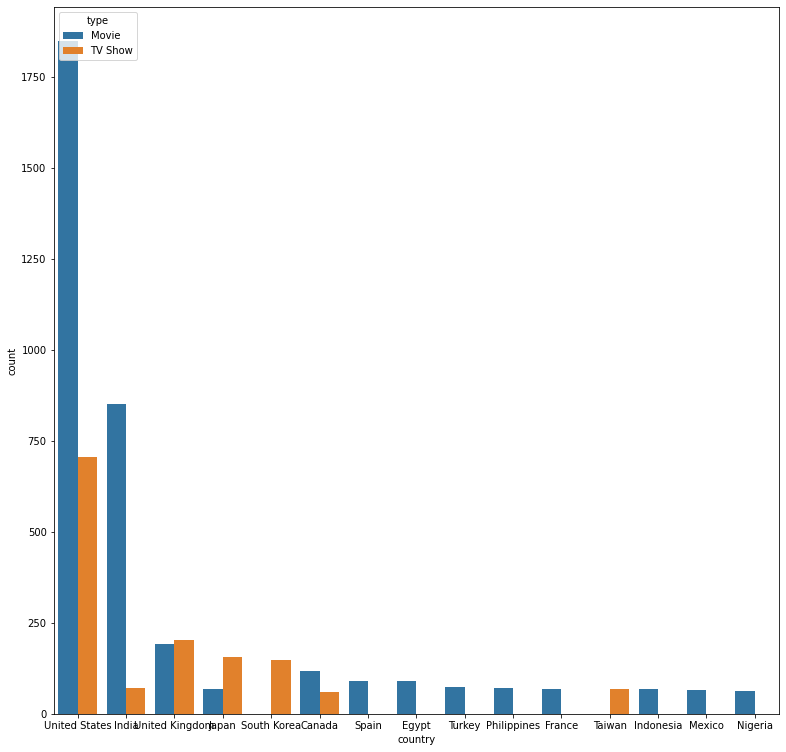

In [22]:
# Visualize top 10 countries producing contents in netflix
sns.barplot('country', 'count',hue='type',data=type_of_content[:20])
rcParams['figure.figsize'] = 10, 5

## <b>Is Netflix has increasingly focusing on TV rather than movies in recent years?



In [23]:
type_year_count = dataset[['type', 'release_year']].value_counts().reset_index().rename(columns={0: 'count'})
type_year_count.head(10)

,type,release_year,count
0,Movie,2017,744
1,Movie,2018,734
2,Movie,2016,642
3,Movie,2019,582
4,TV Show,2020,457
5,TV Show,2019,414
6,Movie,2020,411
7,TV Show,2018,387
8,Movie,2015,382
9,TV Show,2017,268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


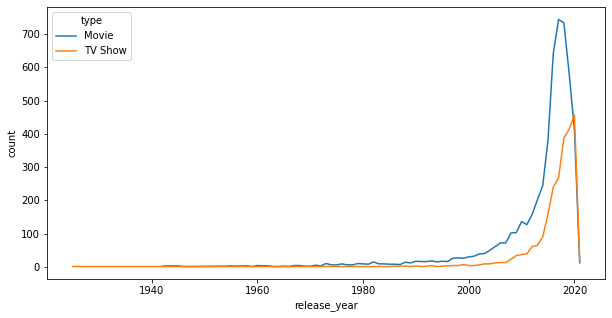

In [24]:
sns.lineplot('release_year', 'count', hue='type', data=type_year_count)
rcParams['figure.figsize'] = 15,5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


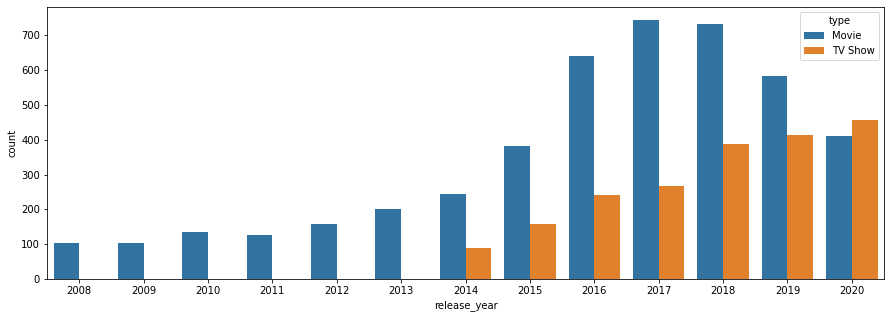

In [25]:
sns.barplot('release_year', 'count', hue='type', data=type_year_count[:20])
rcParams['figure.figsize'] = 14,7

# <b> Clustering similar content by matching text-based feature

In [ ]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
description_data = dataset['description']
description_data.head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

## <b> Preprocessing

### **Removing punctuations**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

### **Apply the function to each examples**

In [ ]:
description_data = description_data.apply(remove_punctuation)
description_data.head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead his fellow ...
3    In a postapocalyptic world ragdoll robots hide...
4    A brilliant group of students become cardcount...
Name: description, dtype: object

In [ ]:
len(description_data)

7787

### **Removing stopwords**

**Extract the stop words**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
np.array(stop_words)

array({'we', 'doing', 'is', 'where', 'below', 'who', 'very', 'at', 'yourself', 'does', 'hadn', 'here', "isn't", 'mustn', 'that', 'how', 'most', 'weren', 'for', 'am', 'after', 'ain', 'theirs', 'will', 'haven', 'just', 'whom', 'our', 'his', 'was', 'has', 'shouldn', 'ours', 'because', 'them', 'in', 'o', 'ma', 'her', 'nor', 'some', 'through', 'both', 'out', "hasn't", 'aren', 'myself', 'again', 'be', 'under', "couldn't", "it's", 'had', 'mightn', 'if', 'of', 'a', 'she', "hadn't", 'or', 'it', 'an', "shan't", 'isn', 'such', 'itself', 'too', 'didn', 'll', 'when', 'i', 'from', 'were', 'me', 'this', "haven't", "you're", 'only', 'between', 'can', 'further', 'own', "should've", 'few', 'himself', 'before', 'your', 'until', 'him', 'they', 'now', 'and', "mustn't", 'do', 'down', 'wasn', 'other', "weren't", 'needn', 'as', 'on', 'by', 'these', 've', 'which', 'above', 'over', 'having', 'have', 'did', 'shan', 'themselves', 'against', 'the', 'there', 'herself', 'why', 'with', 'up', "she's", "wouldn't", 'to'

In [ ]:
print("Number of stopwords: ", len(stop_words))

Number of stopwords:  179


### **Function to remove stopwords**

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
description_data = description_data.apply(stopwords)
description_data.head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

### First we develop a list of the top words used in description, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

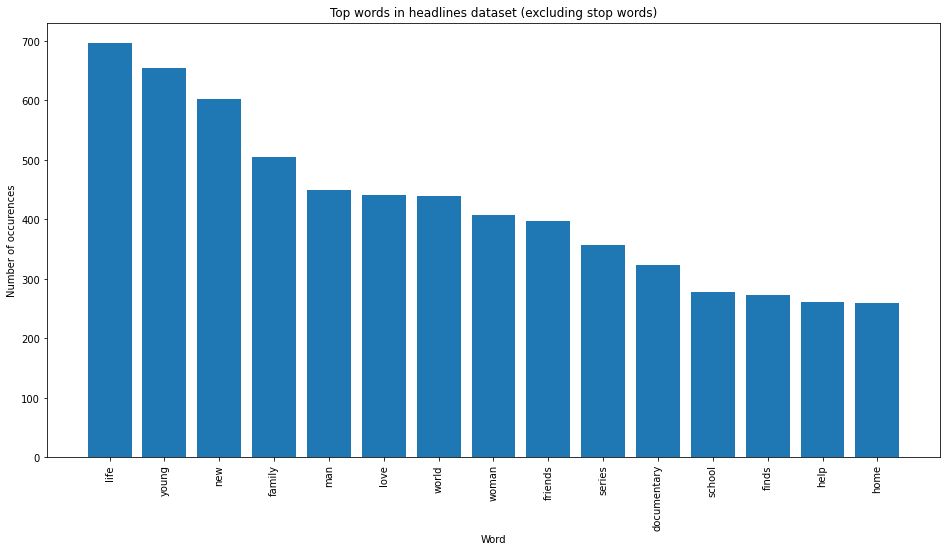

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=description_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in description dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## <b>Preprocessing</b>


### The only preprocessing step required in our case is feature construction, where we take the sample of text description and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the ```CountVectorizer``` object from SKLearn

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
text_sample = description_data.sample(n=7787, random_state=0).values

print('Headline before vectorization: {}'.format(text_sample[123]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Headline after vectorization: \n{}'.format(document_term_matrix[123]))

Headline before vectorization: middleaged actress cast film adaptation play made famous 20 years earlier much less glamorous role
Headline after vectorization: 
  (0, 2893)	1
  (0, 14776)	1
  (0, 6575)	1
  (0, 6330)	1
  (0, 19283)	1
  (0, 11057)	1
  (0, 492)	1
  (0, 504)	1
  (0, 13065)	1
  (0, 170)	1
  (0, 5445)	1
  (0, 7358)	1


### Thus we have our (very high-rank and sparse) training data,  ```small_document_term_matrix```, and can now actually implement a clustering algorithm. Our choice will be Latent Dirichlet Allocation. IT  will take our document-term matrix as input and yield an $n \times N$ topic matrix as output, where $N$ is the number of topic categories (which we supply as a parameter).

## <b>Latent Dirichlet Allocation</b>

### LDA is a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(small_document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(small_document_term_matrix))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more d

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -235494.02395856072
LDA model Perplexity on train data 10463.549038206607


### Once again, we take the $\arg \max$ of each entry in the topic matrix to obtain the predicted topic category for each headline. These topic categories can then be characterised by their most frequent words.


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  24.483457
4       51.163364 -159.968018       2        1  21.236455
0      -73.144554   21.523815       3        1  20.504291
3      -66.410133 -110.606438       4        1  17.870094
1       54.417324   12.443444       5        1  15.905703, topic_info=             Term        Freq       Total Category  logprob  loglift
10184         man  356.000000  356.000000  Default  30.0000  30.0000
18640       young  522.000000  522.000000  Default  29.0000  29.0000
18424       woman  321.000000  321.000000  Default  28.0000  28.0000
8732   interviews   45.000000   45.000000  Default  27.0000  27.0000
5065        drama   96.000000   96.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
7826          hes   24.872206  116.417819   Topic5  -6.4489   0.2951
18600       years   26.684517  193.124096   Topic5  -6.3786  -0.1408
11091      murder   24.801505  140.627808   Topic5  -6.4518   0.1033
17266        true   24.528844  141.280912   Topic5  -6.4628   0.0876
9966         love   24.710766  342.447374   Topic5  -6.4555  -0.7904

[464 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
17         1  0.781795      11
24         3  0.680221      12
24         4  0.170055      12
24         5  0.085028      12
140        5  0.910360    1981
...      ...       ...     ...
18640      3  0.239160   young
18640      4  0.233421   young
18640      5  0.153063   young
18730      4  0.221007  zombie
18730      5  0.773523  zombie

[980 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

#<b> K-Means Clustering

## <B> Feature extraction

In [29]:
data = dataset['description'].values
vec = TfidfVectorizer(stop_words="english")
vec.fit(data)
features = vec.transform(data)

In [45]:
data

array(['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      dtype=object)

## <b>Model training

In [67]:
from sklearn.cluster import MiniBatchKMeans

cls = MiniBatchKMeans(n_clusters=10, random_state= 0)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

##<b> Visualization

In [68]:
from sklearn.decomposition import PCA

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

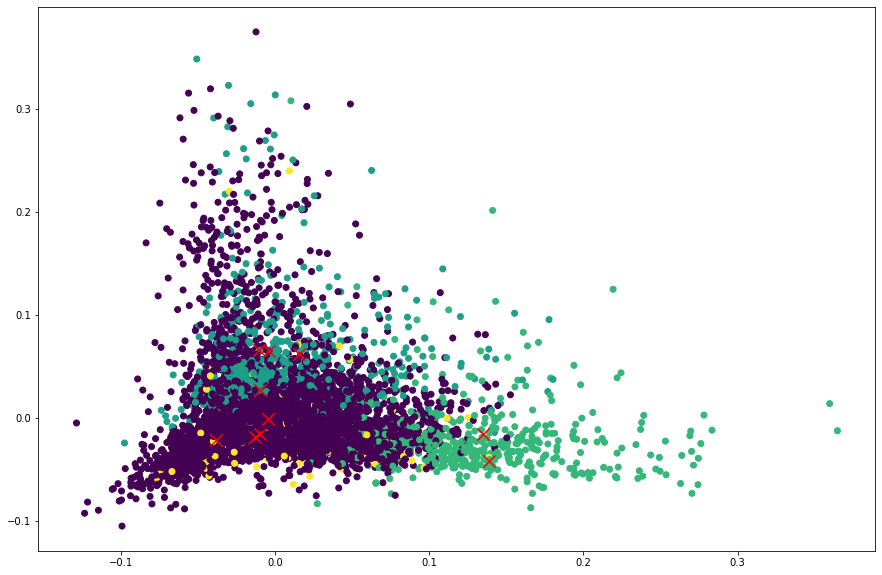

In [70]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')